In [15]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

from   astropy.table     import Table

In [16]:
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [17]:
import pubplot
from   findfile import findfile

In [24]:
version = 'GAMA4'
survey  = 'gama'
dryrun  = False

In [25]:
def grab_ddplimit(fpath):
    dat = fits.open(fpath)

    result = {}
    
    for key in ['RLIM', 'GMR_0P0', 'GMR_0P1', 'ALL']:
        result[key] = dat[1].header[key]
        
    result['DATA']  = Table.read(fpath)
    result['COUNT'] = fpath.split('_')[-1].replace('.fits', '')
    
    print(fpath)
    
    return result

In [26]:
! pwd

/cosma/home/durham/dc-moor2/DESI/docs/nb


In [27]:
fpaths = sorted(glob.glob(os.environ['HOME'] + '/data/GAMA4/ddrp_limits/{}*.fits'.format(survey)))
fpaths

['/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_0.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_1.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_10.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_11.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_12.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_13.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_14.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_15.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_16.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_17.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_18.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_19.fits',
 '/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/g

In [28]:
ddp_limits = [grab_ddplimit(x) for x in fpaths]

/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_0.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_1.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_10.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_11.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_12.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_13.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_14.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_15.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_16.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_17.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_18.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_19.fits
/cosma/home/durham/dc-moor2/data/GAMA4/ddrp_limits/gama_ddrp_limit_2.fits
/cosma/home/durham/dc-moor2/

In [29]:
fpath = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE    = Table.read(fpath)
kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
49666,587722982295273988,221.89800269,-0.6415381,19.241835,0.12458,4,G15_Y1_HS2_033,6,19.763887,19.138214,18.93341,18.772236,19.113127,0.12458,409.8743148290063,38.06325351842394,G15,0,-271.2698035537147,-243.37940556486063,-4.080854256126575,273.30030998287657,241.09224426149586,-4.354889763758178,0.20480347,19.241835,0.1764508816620914,0,1,-0.11560051726479544,-0.08724793213001185,0.04724741726236183,0.051157136749574075,0.20089374730966275,2.12,-0.120842606,-0.26410958,-18.747823689354135,-18.604556713474466,-18.868666295183374,37.989658329857065,38.110500935686304,37.846391353977396,-0.08621053192172294,-0.04868873366801386,0.13051434644047816,0.21648655604564943,-18.83109061853225
139025,587724650333077845,185.31240015,-1.71745883,19.589233,0.07201,3,G12_Y2_005_095,5,20.732338,19.895437,19.584732,19.327354,19.398808,0.07201,228.23871532041073,36.7919465707857,G12,0,-211.89751863006472,-19.70339365082965,-6.381005589922235,212.0490405347563,17.922830436436097,-6.593626673755219,0.31070518,19.589233,0.33415436331369053,0,2,-0.10868117918692531,-0.1321303575636103,0.06394546216931761,0.04512917199872368,0.3295214751071174,2.12,-0.06984971,-0.1526612,-17.196808927331293,-17.11399743017944,-17.266658634517515,36.78604232576879,36.85589203295501,36.70323082861694,-0.12718171114218854,-0.1593859955398793,0.08954316722001257,0.10578929417378397,-17.222406632381986
214264,587725075524682122,129.50683691,0.52589209,18.379673,0.07826,4,G09_Y1_test_116,6,21.10666,19.103128,18.255648,17.893887,17.584246,0.07826,249.18607796654842,36.98261887309769,G9,0,-147.0128822160159,178.2975350217959,2.12113451328627,145.51211007838148,-179.52610400322502,1.9752331235584817,0.8474808,18.379673,0.8946003556432679,0,6,-0.13080627362114147,-0.17792585533862826,0.09635386685755401,0.19452459258337634,0.749310048199959,0.8,-0.0759122,-0.062607996,-18.6233875358904,-18.636691739639105,-18.699299735804857,37.00306054004079,37.07897273995525,37.016364743789495,-0.12145697371273845,-0.1475490985789903,0.09526790464946266,0.11762619113467299,-18.622301573682307
536269,588848898839543956,181.39347962,-0.85282612,17.191727,0.15774,5,322041491755132928,6,19.97562,18.241964,17.1869,16.784622,16.485594,0.15774,530.636077190221,38.62398386856322,G12,0,-458.15155993384866,-11.144813340761596,-6.821934742361414,458.2219394709942,7.296100659330028,-7.281389321955303,1.0550652,17.191727,0.9020483886914233,0,6,-0.03035639699275043,0.12266036934512314,0.19666854631768815,0.4978189925335285,0.7539147088134566,0.8,-0.1530078,-0.126192,-21.475917924963156,-21.502733726822058,-21.6289257303106,38.66764460953347,38.82065241488091,38.69446041139237,-0.06663102658365333,0.03237745329091335,0.15009385177854778,0.2975527430045766,-21.429343230424013
418998,587728879259680951,138.42527661,2.73289256,19.210749,0.15464,4,G09_Y2_031_298,6,21.882418,20.103489,19.081709,18.549156,18.176828,0.15464,519.1491953902114,38.57646092626833,G9,0,-335.97407304578536,298.02679081242127,21

In [30]:
fpath = findfile(ftype='ddp', version=version, dryrun=dryrun, survey=survey)
ddp   = Table.read(fpath)
ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],DDPZLIMS [3],WEIGHT_STEPWISE
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,int64,float64
49666,587722982295273988,221.89800269,-0.6415381,19.241835,0.12458,4,G15_Y1_HS2_033,6,19.763887,19.138214,18.93341,18.772236,19.113127,0.12458,409.8743148290063,38.06325351842394,G15,0,-271.2698035537147,-243.37940556486063,-4.080854256126575,273.30030998287657,241.09224426149586,-4.354889763758178,0.20480347,19.241835,0.1764508816620914,0,1,-0.11560051726479544,-0.08724793213001185,0.04724741726236183,0.051157136749574075,0.20089374730966275,2.12,-0.120842606,-0.26410958,-18.747823689354135,-18.604556713474466,-18.868666295183374,37.989658329857065,38.110500935686304,37.846391353977396,-0.08621053192172294,-0.04868873366801386,0.13051434644047816,0.21648655604564943,-18.83109061853225,0.5581646,0.16536951392988855,0.0,-7.2418346,0.004393118907537945,0.0,0 .. 0,1 .. 0,2.9154826542283168
139025,587724650333077845,185.31240015,-1.71745883,19.589233,0.07201,3,G12_Y2_005_095,5,20.732338,19.895437,19.584732,19.327354,19.398808,0.07201,228.23871532041073,36.7919465707857,G12,0,-211.89751863006472,-19.70339365082965,-6.381005589922235,212.0490405347563,17.922830436436097,-6.593626673755219,0.31070518,19.589233,0.33415436331369053,0,2,-0.10868117918692531,-0.1321303575636103,0.06394546216931761,0.04512917199872368,0.3295214751071174,2.12,-0.06984971,-0.1526612,-17.196808927331293,-17.11399743017944,-17.266658634517515,36.78604232576879,36.85589203295501,36.70323082861694,-0.12718171114218854,-0.1593859955398793,0.08954316722001257,0.10578929417378397,-17.222406632381986,0.21076584,0.07941366026455443,0.0,-7.5892334,0.0022154311730883565,0.0,0 .. 0,1 .. 1,1.6538945935980034
214264,587725075524682122,129.50683691,0.52589209,18.379673,0.07826,4,G09_Y1_test_116,6,21.10666,19.103128,18.255648,17.893887,17.584246,0.07826,249.18607796654842,36.98261887309769,G9,0,-147.0128822160159,178.2975350217959,2.12113451328627,145.51211007838148,-179.52610400322502,1.9752331235584817,0.8474808,18.379673,0.8946003556432679,0,6,-0.13080627362114147,-0.17792585533862826,0.09635386685755401,0.19452459258337634,0.749310048199959,0.8,-0.0759122,-0.062607996,-18.6233875358904,-18.636691739639105,-18.699299735804857,37.00306054004079,37.07897273995525,37.016364743789495,-0.12145697371273845,-0.1475490985789903,0.09526790464946266,0.11762619113467299,-18.622301573682307,1.4203262,0.1420511737557886,0.0,-6.379673,0.0044525628514350945,0.0,0 .. 1,1 .. 1,1.8026043529105287
536269,588848898839543956,181.39347962,-0.85282612,17.191727,0.15774,5,322041491755132928,6,19.97562,18.241964,17.1869,16.784622,16.485594,0.15774,530.636077190221,38.62398386856322,G12,0,-458.15155993384866,-11.144813340761596,-6.821934742361414,458.2219394709942,7.296100659330028,-7.281389321955303,1.0550652,17.191727,0.9020483886914233,0,6,-0.03035639699275043,0.12266036934512314,0.19666854631768815,0.4

In [31]:
ddp.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 113687),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2629899978637695),
             ('DDP1_VZ', 7594754.153764196),
             ('DDP1ZLIMS_NGAL', 113687),
             ('DDP1_NGAL', 45293),
             ('DDP1_DENS', 0.005963721679858641),
             ('DDP2_ZMIN', 0.03914999961853027),
             ('DDP2_ZMAX', 0.1937000006437302),
             ('DDP2_VZ', 3156659.558717707),
             ('DDP2ZLIMS_NGAL', 73942),
             ('DDP2_NGAL', 33396),
             ('DDP2_DENS', 0.01057953807776663),
             ('DDP3_ZMIN', 0.03903000056743622),
             ('DDP3_ZMAX', 0.1015800014138222),
             ('DDP3_VZ', 457819.2340050841),
             ('DDP3ZLIMS_NGAL', 18121),
             ('DDP3_NGAL', 8842),
             ('DDP3_DENS', 0.01931329953669401),
             ('TMR_DDP1', '[-21.8, -20.1]'),
             ('TMR_DDP2', '[-20.6, -19.3]'),


0	0	12.000	0.131	0.164	True
1	1	12.000	0.298	0.299	True
2	10	12.000	0.603	0.555	False
3	11	12.000	0.785	0.682	False
4	12	12.000	0.933	0.773	False
5	13	12.000	1.067	0.900	False
6	14	19.800	0.131	0.164	True
7	15	19.800	0.298	0.299	True
8	16	19.800	0.443	0.423	True
10	18	19.800	0.785	0.682	True
11	19	19.800	0.933	0.773	True
12	2	12.000	0.443	0.423	True
13	20	19.800	1.067	0.900	True
14	21	19.800	0.131	0.164	False
15	22	19.800	0.298	0.299	False
16	23	19.800	0.443	0.423	False
17	24	19.800	0.603	0.555	False
18	25	19.800	0.785	0.682	False
19	26	19.800	0.933	0.773	False
							FAINT: 27
20	27	19.800	1.067	0.900	False
22	4	12.000	0.785	0.682	True
23	5	12.000	0.933	0.773	True
24	6	12.000	1.067	0.900	True
							BRIGHT: 7
25	7	12.000	0.131	0.164	False
26	8	12.000	0.298	0.299	False
27	9	12.000	0.443	0.423	False


(-16.5, -22.5)

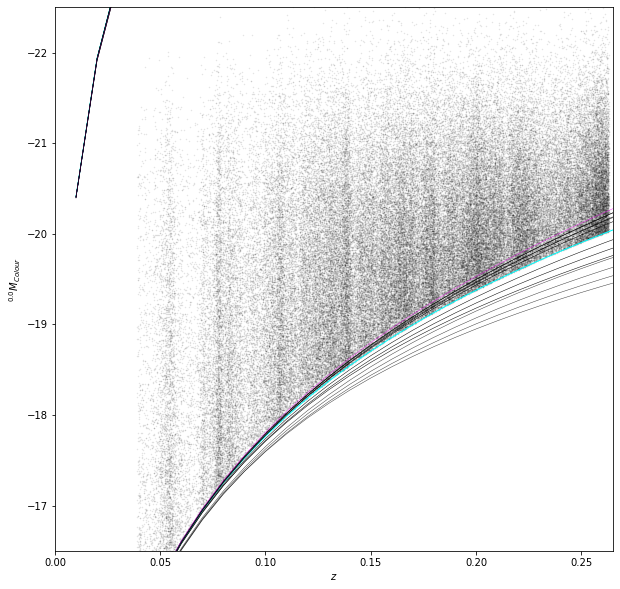

In [32]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

plt.scatter(kE['ZGAMA'], kE['DDPMALL_0P0'], s=0.25, alpha=0.1, c='k')

for i, ddp_limit in enumerate(ddp_limits):
    data = ddp_limit['DATA']
    cnt  = ddp_limit['COUNT']
    rlim = ddp_limit['RLIM']
    
    MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
    if 'COLOR' in MCOL:
        alpha = 0.75
    else:
        alpha = 1.00
    
    if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
        ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
        continue
    
    if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tFAINT: {}'.format(cnt))
        
    elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tBRIGHT: {}'.format(cnt))
        
    else:
        ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
    
    print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
ax.set_xlabel(r'$z$')
ax.set_ylabel('$^{0.0}M_{Colour}$')

ax.set_xlim(  0.0, 0.265)
ax.set_ylim(-16.5, -22.5)

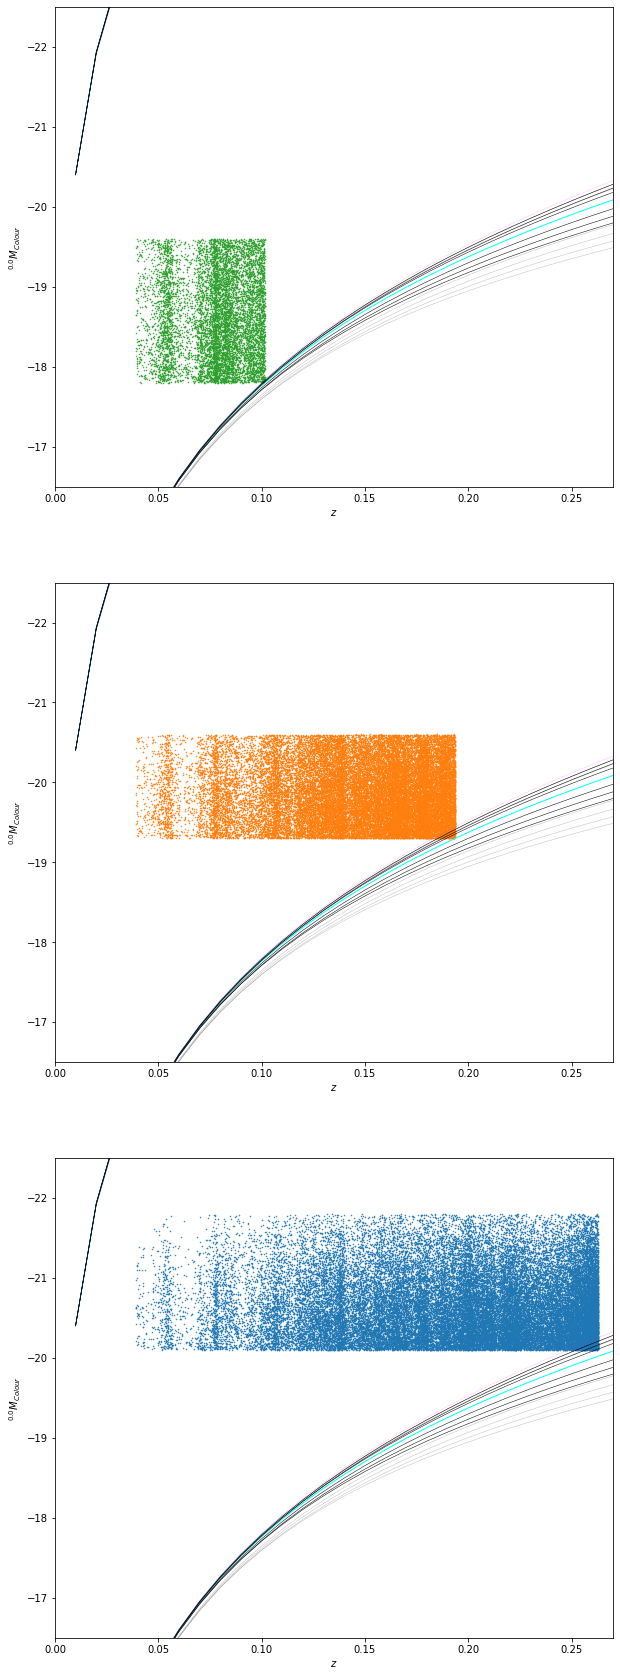

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(10,30))

colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ax in enumerate(axes[::-1]):    
    is_ddp = [x == 1 for x in ddp['DDP'].data[:,i]]
    ax.scatter(ddp['ZGAMA'][is_ddp], ddp['DDPMALL_0P0'][is_ddp], s=0.25, alpha=1., c=colors[i])

for ax in axes:
    for i, ddp_limit in enumerate(ddp_limits):
        data = ddp_limit['DATA']

        cnt  = ddp_limit['COUNT']
        rlim = ddp_limit['RLIM']
        
        MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]

        if 'COLOR' in MCOL:
            alpha = 0.25
        else:
            alpha = 1.0

        if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
            ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
            continue
    
        if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        else:
            ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
        
        # print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
        ax.set_xlabel(r'$z$')
        ax.set_ylabel('$^{0.0}M_{Colour}$')
        
        ax.set_xlim(  0.0, 0.270)
        ax.set_ylim(-16.5, -22.5)

# Done.